# Importing Libraries

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [66]:
dataset = pd.read_csv("cars_dataset.csv")


# Print First & Last 5 Records

In [67]:
print("First 5 Records:\n", dataset.head(5))
print("Last 5 Records:\n", dataset.tail(5))

First 5 Records:
    Car_ID     Brand   Model  Year Fuel_Type Transmission  Kms_Driven  \
0      79    Toyota  ModelI  2014    Diesel       Manual    141645.0   
1     821       Kia  ModelH  2020    Petrol    Automatic      6577.0   
2     152  Mercedes  ModelI  2009    Petrol    Automatic     30216.0   
3    1039       BMW  ModelJ  2021  Electric       Manual     44405.0   
4     337     Honda  ModelB  2019    Petrol       Manual     53785.0   

   Present_Price  Selling_Price Region  
0          30.87           5.19   East  
1          11.99          38.05  North  
2          35.81           1.67   East  
3          24.02          22.39  South  
4          18.26            NaN   East  
Last 5 Records:
       Car_ID     Brand   Model  Year Fuel_Type Transmission  Kms_Driven  \
1195      64       Kia  ModelJ  2010    Petrol    Automatic     72708.0   
1196     626       BMW  ModelB  2005    Petrol    Automatic     26398.0   
1197     135     Honda  ModelF  2008       CNG       Manual  

# Check Dataset Shape, Columns and Datatype


In [68]:
print("--Shape of the Dataset--\n", dataset.shape)
print("--columns in Dataset--\n", dataset.columns.tolist())
print("--Datatype--\n",dataset.dtypes)

--Shape of the Dataset--
 (1200, 10)
--columns in Dataset--
 ['Car_ID', 'Brand', 'Model', 'Year', 'Fuel_Type', 'Transmission', 'Kms_Driven', 'Present_Price', 'Selling_Price', 'Region']
--Datatype--
 Car_ID             int64
Brand             object
Model             object
Year               int64
Fuel_Type         object
Transmission      object
Kms_Driven       float64
Present_Price    float64
Selling_Price    float64
Region            object
dtype: object


# Check for missing values

In [69]:
print("\n Missing Values:")
print(dataset.isnull().sum())


 Missing Values:
Car_ID            0
Brand             0
Model             0
Year              0
Fuel_Type        50
Transmission      0
Kms_Driven       50
Present_Price    50
Selling_Price    50
Region            0
dtype: int64


# Handle missing values (example: fill numeric with median, categorical with mode)

In [70]:
for col in dataset.columns:
    if dataset[col].dtype == "object":
        dataset[col].fillna(dataset[col].mode()[0], inplace=True)
        
    else:
       dataset[col].fillna(dataset[col].median(), inplace=True)
    
print("\nRemaining Missing Values in Each Column:\n")
print(dataset.isnull().sum())


Remaining Missing Values in Each Column:

Car_ID           0
Brand            0
Model            0
Year             0
Fuel_Type        0
Transmission     0
Kms_Driven       0
Present_Price    0
Selling_Price    0
Region           0
dtype: int64


# Remove duplicates

In [71]:
drop_duplicates = dataset.drop_duplicates(inplace=True)
print(drop_duplicates)

None


# Convert Columns to Appropriate Data Types

In [72]:
print("\n Data Types After Conversion:", dataset.dtypes)


 Data Types After Conversion: Car_ID             int64
Brand             object
Model             object
Year               int64
Fuel_Type         object
Transmission      object
Kms_Driven       float64
Present_Price    float64
Selling_Price    float64
Region            object
dtype: object


# Exploratory Data Analysis (EDA)

In [73]:
print("\n Summary Statistics:")
print(dataset.describe())


 Summary Statistics:
            Car_ID         Year     Kms_Driven  Present_Price  Selling_Price
count  1200.000000  1200.000000    1200.000000    1200.000000    1200.000000
mean    600.500000  2014.525833  100423.120833      25.238742      23.072200
std     346.554469     5.777873   55078.500003      13.629598      12.313584
min       1.000000  2005.000000    5060.000000       2.030000       1.060000
25%     300.750000  2009.000000   54098.000000      13.715000      12.840000
50%     600.500000  2015.000000  100913.000000      24.940000      23.335000
75%     900.250000  2019.000000  145975.750000      36.520000      33.242500
max    1200.000000  2024.000000  199999.000000      49.950000      44.990000


# Number of cars sold per brand

In [74]:
brand_sales = dataset["Brand"].value_counts()
print("\n Cars Sold per Brand:")
print(brand_sales)


 Cars Sold per Brand:
Brand
Toyota      143
Hyundai     130
BMW         127
Kia         123
Tata        120
Mercedes    118
Audi        116
Ford        111
Mahindra    108
Honda       104
Name: count, dtype: int64


# Average selling price per brand and fuel type

In [75]:
avg_price_brand = dataset.groupby("Brand")["Selling_Price"].mean().sort_values(ascending=False)
avg_price_fuel = dataset.groupby("Fuel_Type")["Selling_Price"].mean()

print("\n Average Selling Price per Brand:")
print(avg_price_brand)

print("\n Average Selling Price per Fuel Type:")
print(avg_price_fuel)


 Average Selling Price per Brand:
Brand
Toyota      24.885350
Mahindra    24.846759
Kia         23.952033
Ford        23.865586
Hyundai     23.273038
Audi        22.731638
Mercedes    22.277881
Honda       22.177933
BMW         21.392205
Tata        21.124458
Name: Selling_Price, dtype: float64

 Average Selling Price per Fuel Type:
Fuel_Type
CNG         23.474929
Diesel      22.726065
Electric    23.697599
Petrol      22.330797
Name: Selling_Price, dtype: float64


# Top 5 most sold car models

In [76]:
top_models = dataset["Model"].value_counts().head(5)
print("\n Top 5 Most Sold Car Models:")
print(top_models)



 Top 5 Most Sold Car Models:
Model
ModelB    138
ModelE    127
ModelI    124
ModelH    121
ModelJ    117
Name: count, dtype: int64


# Correlation matrix

In [77]:
print("\n Correlation Matrix:")
print(dataset.corr(numeric_only=True))



 Correlation Matrix:
                 Car_ID      Year  Kms_Driven  Present_Price  Selling_Price
Car_ID         1.000000 -0.013272   -0.039886       0.013070       0.016070
Year          -0.013272  1.000000   -0.038952       0.002738       0.012507
Kms_Driven    -0.039886 -0.038952    1.000000       0.028216      -0.011255
Present_Price  0.013070  0.002738    0.028216       1.000000      -0.047825
Selling_Price  0.016070  0.012507   -0.011255      -0.047825       1.000000


# Data Visualization

# Bar chart — Number of cars sold per brand

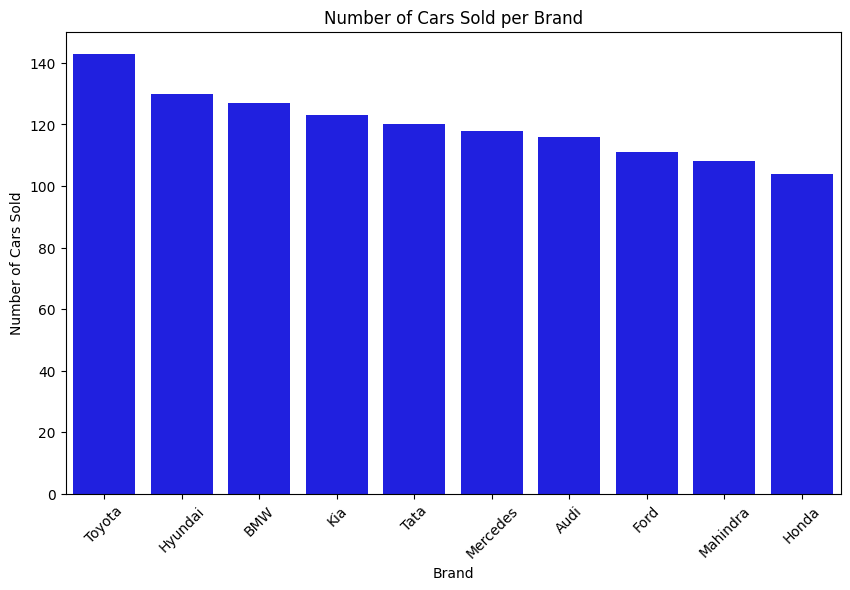

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_sales.index, y=brand_sales.values, color='blue')
plt.title("Number of Cars Sold per Brand")
plt.xlabel("Brand")
plt.ylabel("Number of Cars Sold")
plt.xticks(rotation=45)
plt.show()

# Pie chart — Fuel type distribution

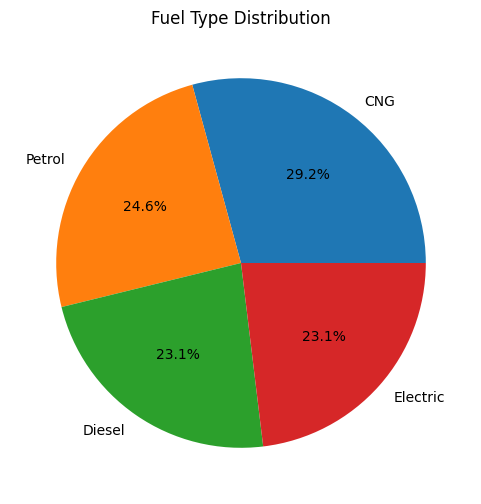

In [79]:
plt.figure(figsize=(6, 6))
dataset["Fuel_Type"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Fuel Type Distribution")
plt.ylabel("")
plt.show()

# Line chart — Sales trend by year

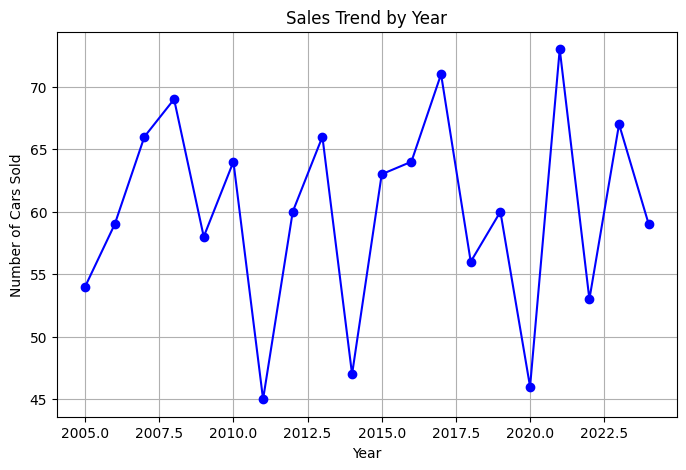

In [80]:
plt.figure(figsize=(8, 5))
yearly_sales = dataset['Year'].value_counts().sort_index()
plt.plot(yearly_sales.index, yearly_sales.values, marker="o", color="b")
plt.title("Sales Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Cars Sold")
plt.grid(True)
plt.show()


# Box plot — Selling price vs fuel type

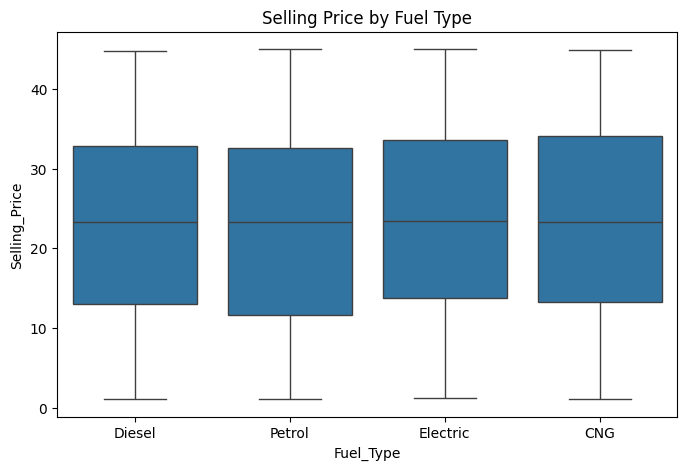

In [81]:

plt.figure(figsize=(8, 5))
sns.boxplot(x="Fuel_Type", y="Selling_Price", data=dataset)
plt.title("Selling Price by Fuel Type")
plt.show()

# Scatter plot — Present price vs selling price

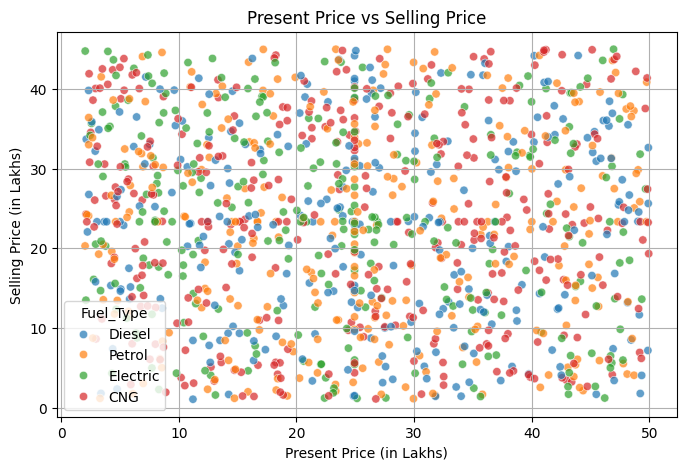

In [82]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Present_Price", y="Selling_Price", data=dataset, hue="Fuel_Type", alpha=0.7)
plt.title("Present Price vs Selling Price")
plt.xlabel("Present Price (in Lakhs)")
plt.ylabel("Selling Price (in Lakhs)")
plt.grid()
plt.show()